In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')
print("First 5 rows:")
print(df.head())


First 5 rows:
   Age  EstimatedSalary  Purchased
0   19            19000          0
1   35            20000          0
2   26            43000          0
3   27            57000          0
4   19            76000          0


In [3]:

print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB
None


In [4]:
print("\nDescriptive Statistics:")
print(df.describe())


Descriptive Statistics:
              Age  EstimatedSalary   Purchased
count  400.000000       400.000000  400.000000
mean    37.655000     69742.500000    0.357500
std     10.482877     34096.960282    0.479864
min     18.000000     15000.000000    0.000000
25%     29.750000     43000.000000    0.000000
50%     37.000000     70000.000000    0.000000
75%     46.000000     88000.000000    1.000000
max     60.000000    150000.000000    1.000000


In [5]:
print("\nMissing Values Check:")
print(df.isnull().sum())


Missing Values Check:
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64


Text(0.5, 1.0, 'Age Distribution')

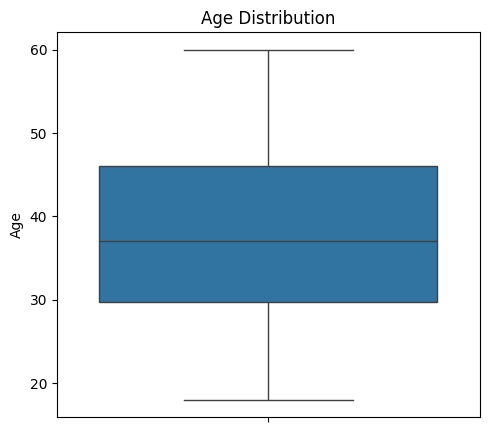

In [6]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=df, y='Age')
plt.title('Age Distribution')

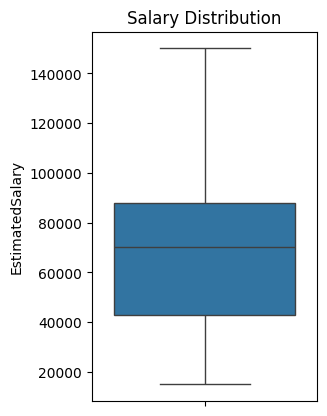

In [7]:
plt.subplot(1, 2, 2)
sns.boxplot(data=df, y='EstimatedSalary')
plt.title('Salary Distribution')
plt.show()

In [8]:
X = df[['Age', 'EstimatedSalary']]
y = df['Purchased']

# Split data (75% train, 25% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [9]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

LogisticRegression()

In [11]:
y_pred = log_reg.predict(X_test_scaled)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)


Confusion Matrix:
[[61  2]
 [12 25]]


In [12]:
TN, FP, FN, TP = cm.ravel()

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [13]:
print("\nPerformance Metrics:")
print(f"True Positives (TP): {TP}")
print(f"False Positives (FP): {FP}")
print(f"True Negatives (TN): {TN}")
print(f"False Negatives (FN): {FN}")
print(f"\nAccuracy: {accuracy:.4f}")
print(f"Error Rate: {error_rate:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall/Sensitivity: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")



Performance Metrics:
True Positives (TP): 25
False Positives (FP): 2
True Negatives (TN): 61
False Negatives (FN): 12

Accuracy: 0.8600
Error Rate: 0.1400
Precision: 0.9259
Recall/Sensitivity: 0.6757
F1 Score: 0.7812
